### Week 3 day 2

# Time series

## Timestamps

`pandas` represents an instant in time using pandas.Timestanp class:

In [1]:
import pandas as pd

# create a timetsamp
pd.Timestamp(year = 2025,
             month = 10,
             hour = 9,
             day = 16,
             minute = 56,
             second = 40)

Timestamp('2025-10-16 09:56:40')

In [3]:
pd.Series([pd.Timestamp(2020,10,16),
          pd.Timestamp(2020,10,17),
          pd.Timestamp(2020,10,18)])

0   2020-10-16
1   2020-10-17
2   2020-10-18
dtype: datetime64[ns]

In [5]:
# read in data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

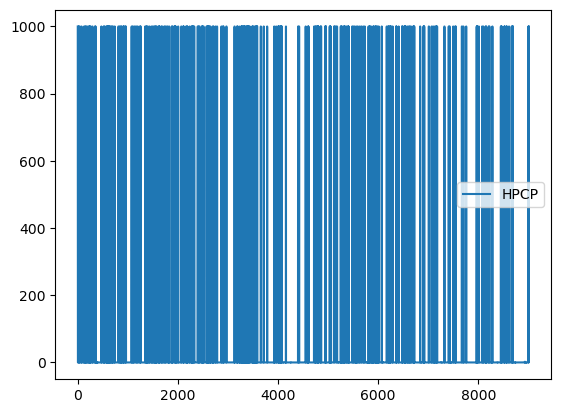

In [6]:
#plot hourly preciptitation in bolder CO
precip.plot()

## Read in missing dtat values
Meta data indictated missing values are 999.99
We can directly read in theis value as a NA value using pd.read_csv

In [8]:
#Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

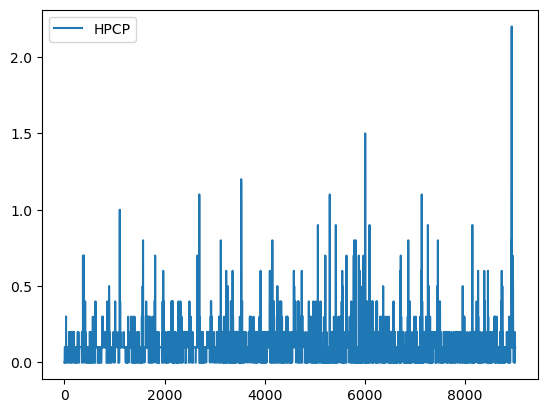

In [9]:
precip.plot()

## COnvert stings into dates

Notice date column in our dataframe is not od type datetime

In [10]:
#check wether Date column is of type datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [11]:
# Convert date column to timestamos
pd.to_datetime(precip['DATE'])

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [12]:
precip['DATE']

0       20000101 00:00
1       20000101 01:00
2       20000102 20:00
3       20000103 01:00
4       20000103 05:00
             ...      
9001    20131222 01:00
9002    20131223 00:00
9003    20131223 02:00
9004    20131229 01:00
9005    20131231 00:00
Name: DATE, Length: 9006, dtype: object

In [16]:
#concert dayte column to timestamps
precip['DATE'] = pd.to_datetime(precip['DATE'])

#check type
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<Axes: xlabel='DATE'>

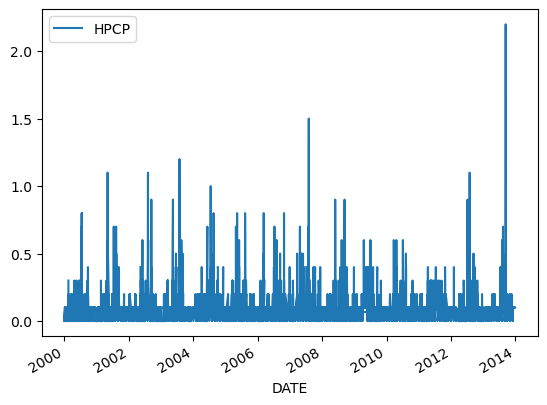

In [17]:
precip.plot(x='DATE', y='HPCP')

In [21]:
precip = precip.set_index('DATE')

KeyError: "None of ['DATE'] are in the columns"

In [22]:
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


In [24]:
## Read in dataset in specific format

precip = pd.read_csv(URL,
                    na_values=[999.99],
                    index_col=['DATE'],
                    parse_dates=['DATE'])
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Subsetting by date

we can use .loc[year-month] to selct data froma speicifc month and year

In [25]:
# Select precip data from SEP 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [ ]:
# selct 2013 precip data

In [29]:
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

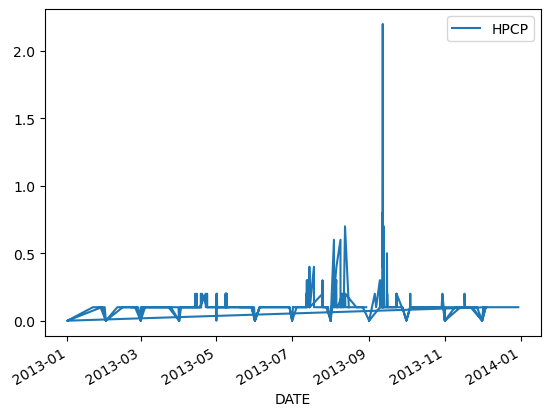

In [28]:
precip.loc['2013'].plot()

# Resample

resampling a time series means converting sa s=time series from one frfrquencyy to anoter. For example monthly, eyarly(downsalpling), weekly to daily(upsampling)

we can resample with the resample() method the simples use is to calll

```
df.resample(new_frequency).aggregator_function()
```
Where:
- `newfrequency`: is a string representing the new prefquency to resample the data: D for day, w for week and y year , andf  for month
- `aggregator_function()`: is the function we will use to agregate the data into the new frequncy. for ex: `max(), min(), sum(), averge()`

### EX:
our 2013 precip data has hoirly fequency, we want to resample it to daily frequency (downsampling)

In [32]:
#resample 2013 hourly data to daily frerq
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

<Axes: xlabel='DATE'>

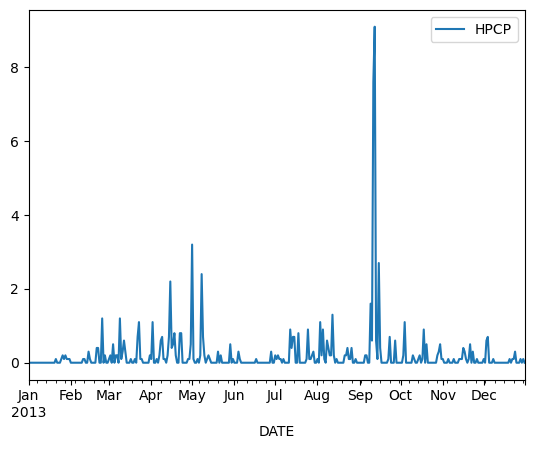

In [34]:
daily_precip_2013.plot()

<Axes: title={'center': 'Preciptitaion in Boulder, Co'}, xlabel='DATE', ylabel='daily precipitation (in)'>

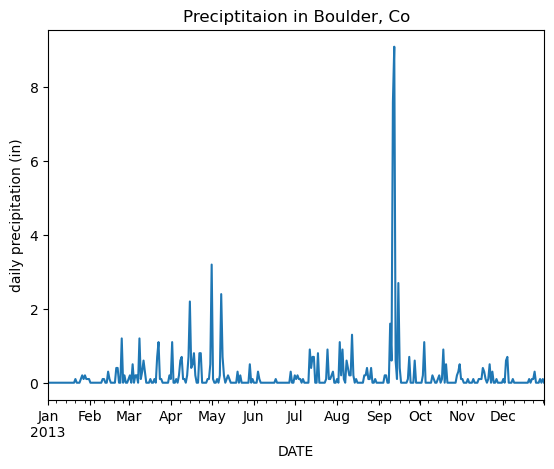

In [37]:
daily_precip_2013.plot(ylabel= "daily precipitation (in)",
                      title = "Preciptitaion in Boulder, Co",
                      legend = False)